In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint
from scipy.integrate import solve_ivp
import random


In [2]:
def SAIR(y,t,beta,q, gamma,kappa, rho,delta):
    S, A, I, R = y
    dS = -beta * S * (A+I) +delta*R
    dA = q*beta * S * (A+I) - rho*A-kappa*A
    dI = (1-q)*beta * S * (A+I) +rho*A-gamma*I
    dR = kappa*A+gamma * I-delta*R
    return dS, dA, dI, dR

In [3]:
#set parameters
beta_uv = 0.20
beta_v=0.0001
#proportion of vaccinated population p
q=0.7
gamma = 0.07
kappa=0.08
rho=0.15
delta = 0.003

#initial condition for proportion of S, A, I, R
A0=0.004
I0=0.003
R0=0.005
S0=1-A0-I0-R0

#computing effective transmission rate with vaccinations
def beta_eff(beta_uv, beta_v, p):
    return beta_uv*(1-p)+beta_v*p


In [4]:
#Phase 1(45days):no control
p=0
y0=S0,A0,I0,R0
t = np.linspace(0, 45, 45)
print(beta_eff(beta_uv, beta_v, p))
sol=odeint(SAIR, y0, t, args=(beta_eff(beta_uv, beta_v, p),q, gamma,kappa, rho,delta))
df1=pd.DataFrame({"S":sol.T[0],"A":sol.T[1],"I":sol.T[2],"R":sol.T[3]})


0.2


In [5]:
#Phase 2(45 days):travel limitations
p=0
beta_uv=0.18
S1=df1["S"][44]
A1=df1["A"][44]
I1=df1["I"][44]
R1=df1["R"][44]
y1=S1,A1,I1,R1
t = np.linspace(0, 30, 30)
print(beta_eff(beta_uv, beta_v, p))
sol=odeint(SAIR, y1, t, args=(beta_eff(beta_uv, beta_v, p),q, gamma,kappa, rho,delta))
df2=pd.DataFrame({"S":sol.T[0],"A":sol.T[1],"I":sol.T[2],"R":sol.T[3]})

0.18


In [6]:
#Phase 3(120 days):strict quarantine
p=0
beta_uv=0.07
S2=df2["S"][29]
A2=df2["A"][29]
I2=df2["I"][29]
R2=df2["R"][29]
y2=S2,A2,I2,R2
t = np.linspace(0, 120, 120)
print(beta_eff(beta_uv, beta_v, p))
sol=odeint(SAIR, y2, t, args=(beta_eff(beta_uv, beta_v, p),q, gamma,kappa, rho,delta))
df3=pd.DataFrame({"S":sol.T[0],"A":sol.T[1],"I":sol.T[2],"R":sol.T[3]})

0.07


In [7]:
#Phase 4(90 days):relax lockdown
p=0
beta_uv=0.15
S3=df3["S"][119]
A3=df3["A"][119]
I3=df3["I"][119]
R3=df3["R"][119]
y3=S3,A3,I3,R3
t = np.linspace(0, 90, 90)
print(beta_eff(beta_uv, beta_v, p))
sol=odeint(SAIR, y3, t, args=(beta_eff(beta_uv, beta_v, p),q, gamma,kappa, rho,delta))
df4=pd.DataFrame({"S":sol.T[0],"A":sol.T[1],"I":sol.T[2],"R":sol.T[3]})

0.15


In [8]:
#Phase 4(120 days):population getting vaccinated(gradually)
beta_uv=0.15

#phase4.1:20% vaccinated(30 days)
p=0.2
S4=df4["S"][89]
A4=df4["A"][89]
I4=df4["I"][89]
R4=df4["R"][89]
y4=S4,A4,I4,R4
t = np.linspace(0, 30, 30)
print(beta_eff(beta_uv, beta_v, p))
sol = odeint(SAIR, y4, t, args=(beta_eff(beta_uv, beta_v, p),q, gamma,kappa, rho,delta))
df5=pd.DataFrame({"S":sol.T[0],"A":sol.T[1],"I":sol.T[2],"R":sol.T[3]})

#phase4.2:40% vaccinated(30 days)
p=0.4
S5=df5["S"][29]
A5=df5["A"][29]
I5=df5["I"][29]
R5=df5["R"][29]
y5=S5,A5,I5,R5
t = np.linspace(0, 30, 30)
print(beta_eff(beta_uv, beta_v, p))
sol = odeint(SAIR, y5, t, args=(beta_eff(beta_uv, beta_v, p),q, gamma,kappa, rho,delta))
df6=pd.DataFrame({"S":sol.T[0],"A":sol.T[1],"I":sol.T[2],"R":sol.T[3]})

#phase4.3:50% vaccinated(30 days), lockdown further relaxed
p=0.5
beta_uv=0.25
S6=df6["S"][29]
A6=df6["A"][29]
I6=df6["I"][29]
R6=df6["R"][29]
y6=S6,A6,I6,R6
t = np.linspace(0, 30, 30)
print(beta_eff(beta_uv, beta_v, p))
sol = odeint(SAIR, y6, t, args=(beta_eff(beta_uv, beta_v, p),q, gamma,kappa, rho,delta))
df7=pd.DataFrame({"S":sol.T[0],"A":sol.T[1],"I":sol.T[2],"R":sol.T[3]})

#phase4.4: 70% vaccinated(30 days)
p=0.7
S7=df7["S"][29]
A7=df7["A"][29]
I7=df7["I"][29]
R7=df7["R"][29]
y7=S7,A7,I7,R7
t = np.linspace(0,30,30)
print(beta_eff(beta_uv, beta_v, p))
sol = odeint(SAIR, y7, t, args=(beta_eff(beta_uv, beta_v, p),q, gamma,kappa, rho,delta))
df8=pd.DataFrame({"S":sol.T[0],"A":sol.T[1],"I":sol.T[2],"R":sol.T[3]})

0.12002
0.09004
0.12505
0.07507000000000001


In [9]:
#Phase 5(210 days):new virus strains appears
beta_uv=0.35
S8=df8["S"][29]
A8=df8["A"][29]
I8=df8["I"][29]
R8=df8["R"][29]
y8=S8,A8,I8,R8
t = np.linspace(0, 210, 210)
print(beta_eff(beta_uv, beta_v, p))
sol=odeint(SAIR, y8, t, args=(beta_eff(beta_uv, beta_v, p),q, gamma,kappa, rho,delta))
df9=pd.DataFrame({"S":sol.T[0],"A":sol.T[1],"I":sol.T[2],"R":sol.T[3]})

0.10507000000000001


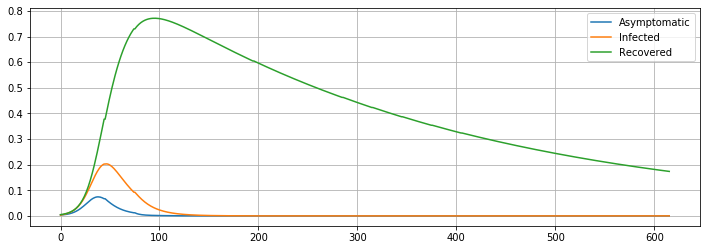

In [10]:
frames=[df1,df2,df3,df4,df5,df6,df7,df8,df9]
df=pd.concat(frames)
t = np.linspace(0, 615, 615)
fig = plt.figure(figsize=(12,4))
plt.plot(t,df["A"])
plt.plot(t,df["I"])
plt.plot(t,df["R"])
plt.grid("True")
plt.legend(["Asymptomatic","Infected","Recovered"])